# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

19


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

City not found. skipping.
Processing record 1|bluff
Processing record 2|tasiilaq
Processing record 3|souillac
Processing record 4|punta arenas
Processing record 5|grand gaube
City not found. skipping.
Processing record 6|tuatapere
Processing record 7|saldanha
Processing record 8|rikitea
Processing record 9|hasaki
Processing record 10|shingu
Processing record 11|ushuaia
Processing record 12|buraydah
Processing record 13|geraldton
Processing record 14|broken hill
Processing record 15|chihuahua
Processing record 16|avarua
Processing record 17|korla


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/city.csv")

#Displaying dataframe
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Bluff,99,NZ,1619818438,93,-46.6000,168.3333,44.01,4.00
1,Tasiilaq,41,GL,1619818438,86,65.6145,-37.6368,30.20,5.75
2,Souillac,40,MU,1619818439,83,-20.5167,57.5167,77.00,11.50
3,Punta Arenas,90,CL,1619818359,93,-53.1500,-70.9167,42.80,6.91
4,Grand Gaube,24,MU,1619818245,79,-20.0064,57.6608,78.01,7.00
5,Tuatapere,100,NZ,1619818164,93,-46.1333,167.6833,43.00,4.00
6,Saldanha,0,ZA,1619818440,67,-33.0117,17.9442,55.40,9.22
7,Rikitea,88,PF,1619818441,77,-23.1203,-134.9692,78.80,20.67
8,Hasaki,40,JP,1619818442,94,35.7333,140.8333,55.40,3.44


In [5]:
city_df.count()

City          17
Cloudiness    17
Country       17
Date          17
Humidity      17
Lat           17
Lng           17
Max Temp      17
Wind Speed    17
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

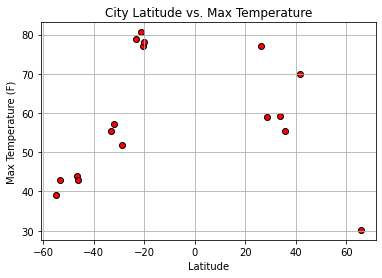

In [8]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature")
plt.savefig("../output_data/Lat_vs_temp_plot")

## Latitude vs. Humidity Plot

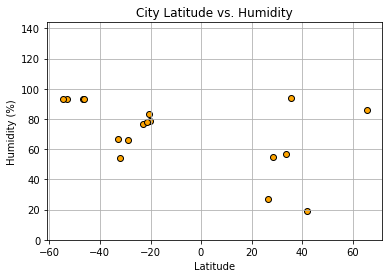

In [9]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
plt.savefig("../output_data/plot_lat_vs_hum")

## Latitude vs. Cloudiness Plot

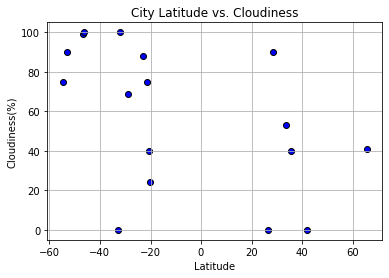

In [10]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness")
plt.savefig("../output_data/plot_lat_vs_clouds")

## Latitude vs. Wind Speed Plot

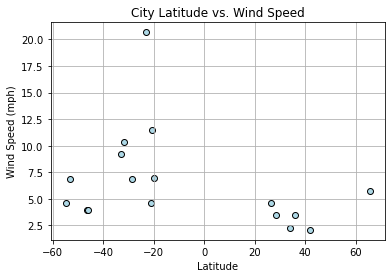

In [11]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "lightblue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed")
plt.savefig("../output_data/plot_lat_windspeed")

## Linear Regression

In [12]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8332332770721153
None


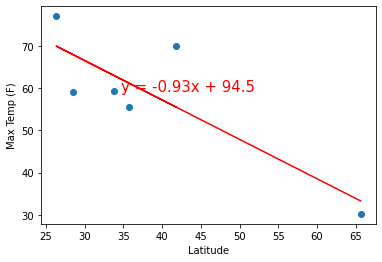

In [14]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.9276936084675239
None


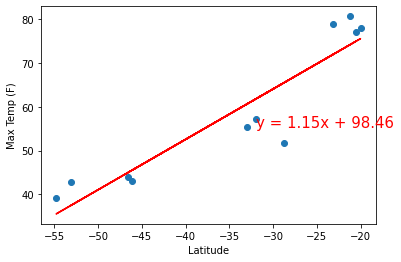

In [15]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4378200566140527
None


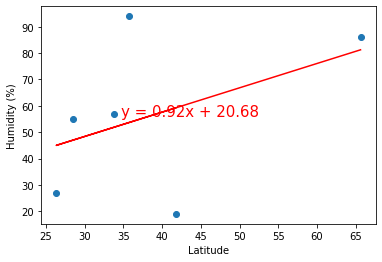

In [16]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.573985954620442
None


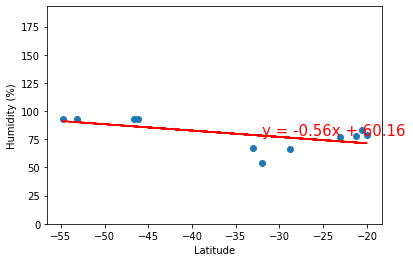

In [17]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0722430221741798
None


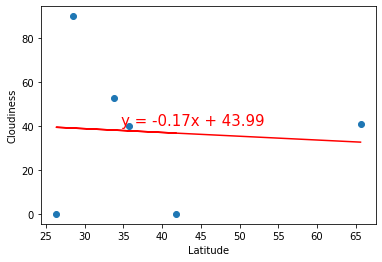

In [18]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.4486180427031252
None


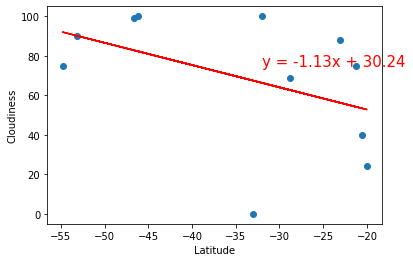

In [19]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.4945627249792115
None


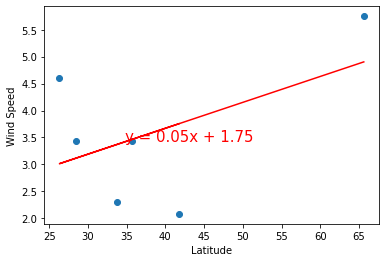

In [20]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.48844543252984035
None


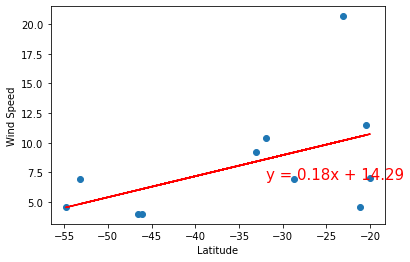

In [21]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))